X shape : (10000, 3, 32, 32) (3, 32, 32)
X_scaled : (10000, 3, 32, 32) (3, 32, 32)
X_norm shape : (10000, 3, 32, 32) (3, 32, 32)
X shape : (10000, 32, 32, 3) X_scaled : (10000, 32, 32, 3) X_norm shape : (10000, 32, 32, 3)


Text(0.5, 0.98, 'Scaled down and Un-Normalized Images')

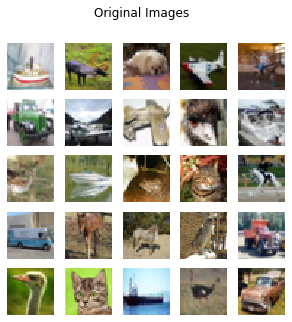

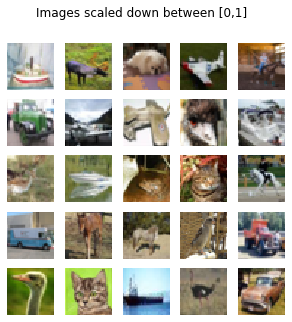

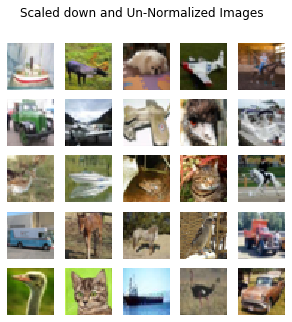

In [181]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle

# Per-channel Mean and standard deviation values in BGR order
cifar10_MEAN = [125.3, 123.0, 113.9]
cifar10_SD = [63.0, 62.1, 66.7]

# Load data
f = open('path/to/dataset/data_batch_1', 'rb')
datadict = cPickle.load(f,encoding='latin1')
f.close()

# rearrange in CHW format
X = datadict["data"] 
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).astype("float")
X_norm = np.zeros_like(X)

# [0, 255] -> [0, 1]
X_scaled = X / 255
Y = np.array(Y)

# Color normalization
for i in range(X_scaled.shape[0]):
    for j in range(X_scaled[i].shape[0]):
        X_norm[i][j] = X_scaled[i][j] - cifar10_MEAN[j]
        X_norm[i][j] =  X_norm[i][j] / cifar10_SD[j]

# Verify the shapes
print("X shape :", X.shape, X[0].shape)
print("X_scaled :", X_scaled.shape, X_scaled[0].shape)
print("X_norm shape :", X_norm.shape, X_norm[0].shape)

# print pixel values for first image for comparison of the scaling and normalization operations.
# print("X[0] :", X[0])
# print("X_scaled[0] :", X_scaled[0])
# print("X_norm[0] :", X_norm[0])

X = X.transpose(0,2,3,1).astype("uint8")
X_scaled = X_scaled.transpose(0,2,3,1)
X_norm = X_norm.transpose(0,2,3,1)
print("X shape :", X.shape, "X_scaled :", X_scaled.shape, "X_norm shape :", X_norm.shape)

#Visualizing CIFAR 10
np.random.seed(0)
fig, axes1 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])
plt.suptitle('Original Images')

np.random.seed(0)
fig, axes2 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_scaled)))
        axes2[j][k].set_axis_off()
        axes2[j][k].imshow(X_scaled[i:i+1][0])
plt.suptitle('Images scaled down between [0,1]')

X_unnorm = X_norm.transpose(0,3,1,2)
# Color de-normalization
for i in range(X_unnorm.shape[0]):
    for j in range(X_unnorm[i].shape[0]):
        X_unnorm[i][j] =  X_unnorm[i][j] * cifar10_SD[j]
        X_unnorm[i][j] = X_unnorm[i][j] + cifar10_MEAN[j]       

X_unnorm = X_unnorm.transpose(0,2,3,1)
np.random.seed(0)
fig, axes3 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_unnorm)))
        axes3[j][k].set_axis_off()
        axes3[j][k].imshow(X_unnorm[i:i+1][0])
plt.suptitle('Scaled down and Un-Normalized Images')